In [19]:
from vodscillator import *
import matplotlib.pyplot as plt
import numpy as np
import pickle
from plots import *
from vlodder import *
import scipy.io
from scipy.signal import *

In [20]:
#filename = "V&D fig 2A, loc=0, glob=0.pkl"
#filename = "V&D fig 2A, loc=0.1, glob=0.1.pkl"
#filename = "V&D fig 5, loc=0.0785, glob=0, sr=128.pkl"
#filepath = "/home/deniz/Dropbox/vodscillators/deniz pickle jar/"
#with open(filepath + filename, 'rb') as picklefile:
#    vod = pickle.load(picklefile)
    #this "assert" statement will let VSCode know that this is a Vodscillator, so it will display its documentation for you!
#    assert isinstance(vod, Vodscillator)
#
#vod.n_win = vod.n_ss
#vod.save()

#filename = 'AC6rearSOAEwfB1.mat'
filename = 'TH14RearwaveformSOAE.mat'
mat = scipy.io.loadmat('SOAE Data/' + filename)
wf = np.squeeze(mat['wf'])
wf_title = filename

#wf = vod.SOO_sol[vod.n_transient:]

#wf = np.pad(wf, 20) #padding might help???


In [21]:
sr = 44100 #44100 for SOAE data, 128 for vod simulation
win_size = 2048
xmin=0
xmax=None
ymin=None
ymax=None
# ymin=0
# ymax=8
#t_win = win_size / sample_rate
t_win = 0.1
hann = True
t_shift = t_win  #set this to half the window size #it used to be 0.1
khz=True
db = True

In [44]:
def temp_plot(wf, ax):
    # get wfft so we don't have to do it twice below
    d = get_wfft(wf=wf, sr=sr, t_win=t_win, t_shift=t_shift, hann=hann)
    wfft = d["wfft"]
    # we'll want to pass this through the subsequent functions as well to maintain correspondence through all the shifts
    freq_ax = d["freq_ax"]
    

    # get (averaged over windows) PSD
    m = get_mags(wf=wf, sr=sr, t_win=t_win, wfft=wfft, freq_ax=freq_ax, return_all=True)
    mags = m["mags"]
    mags_freq_ax = m["freq_ax"]
    # get coherence
    c = get_coherence(wf=wf, sr=sr, t_win=t_win, wfft=wfft, ref_type=ref_type, freq_ax=freq_ax, bin_shift=1, return_all=True)
    coherence = c["coherence"]
    coherence_freq_ax = c["freq_ax"]

    
    if khz:
        mags_freq_ax = mags_freq_ax / 1000
        coherence_freq_ax = coherence_freq_ax / 1000


    if db:
        mags = 20*np.log10(mags)

    
    ax.plot(coherence_freq_ax, coherence, color='purple', label="Phase coherence")
    ax.set_ylabel("Vector Strength")
    ax.set_xlabel("Frequency [kHz]")
    ax.legend(loc="upper right")
    
    ax2 = ax.twinx()
    ax2.plot(mags_freq_ax, mags, color="orange", label="Magnitude")
    ax2.set_ylabel("Amplitude Spectral Density [dB]")
    ax2.set_xlabel("Frequency [kHz]")
    ax2.legend(loc="lower right")
    


    # plot + set labels

    #phase_diffs = c["phase_diffs"]
    #means = np.mean(np.abs(phase_diffs[:, :])/np.pi, 0)
    #label = r"$\langle|\phi_j^{{\theta}}|\rangle/\pi$"
    #ax.plot(coherence_freq_ax, means, label=label, color='C0')


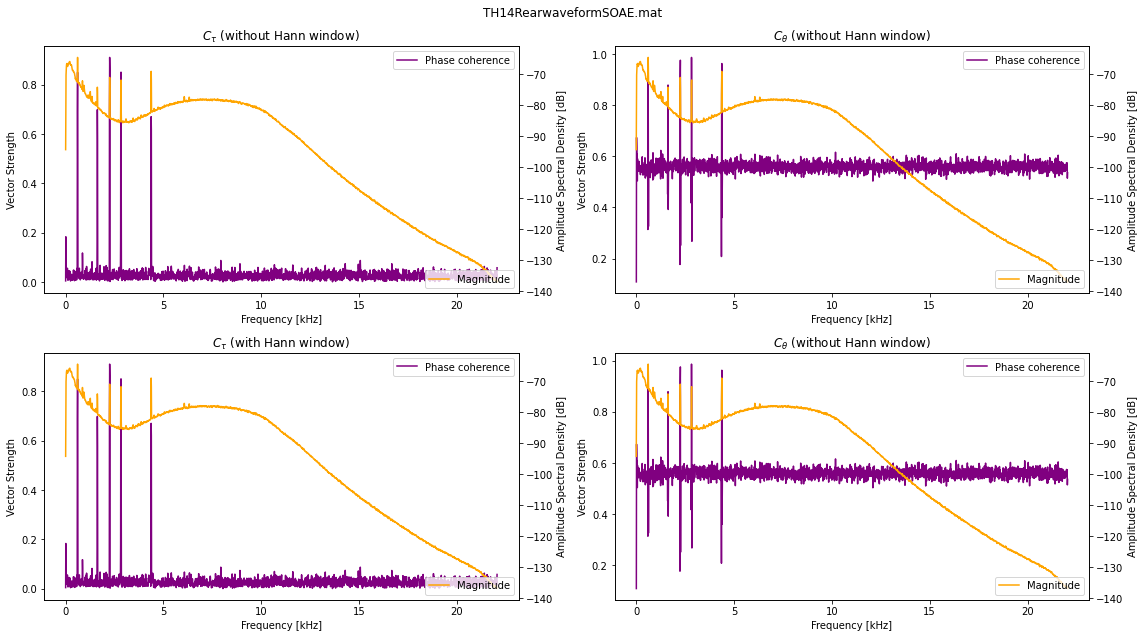

In [45]:
fig, _ = plt.subplots(2, 2)
axes = fig.axes



#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "DejaVuSans"
#    "font."
#})


fig.suptitle(str((filename)))




ref_type = "next_win"
temp_plot(wf, axes[0])
axes[0].set_title(r"$C_{\tau}$ (without Hann window)")


ref_type="next_freq"
temp_plot(wf, axes[1])
axes[1].set_title(r"$C_{\theta}$ (without Hann window)")


ref_type = "next_win"
temp_plot(wf, axes[2])
axes[2].set_title(r"$C_{\tau}$ (with Hann window)")


ref_type="next_freq"
temp_plot(wf, axes[3])
axes[3].set_title(r"$C_{\theta}$ (without Hann window)")


dpi=300
reso=[16, 9]
bbox="tight"
plt.gcf().set_size_inches(reso) # set figure's size manually to your full screen (32x18)
plt.tight_layout()



save_name = str("Hann comparison " + str(filename) + ".png")
plt.savefig(save_name, dpi=dpi, bbox_inches=bbox)
plt.show()

